# Learning Slowdown
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Puntos dentro de un círculo con ANN

#### Datos de entrenamiento

In [3]:
X = np.random.rand(2500,2)
Y = []
for i in range(0, len(X)):
    Y.append([0] if ((X[i][0]-0.5)**2)+((X[i][1]-0.5)**2)<=0.4**2 else [1])
Y = np.array(Y)

#### Visualización de los datos de entrenamiento

(0, 1)

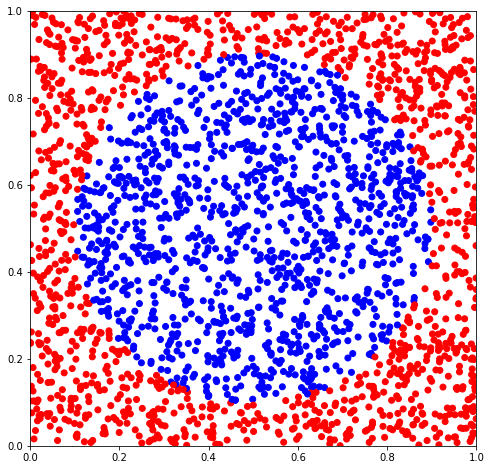

In [4]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(X[:,0],X[:,1], c=['red' if i==1 else 'blue' for i in Y])
plt.ylim([0,1])
plt.xlim([0,1])

#### Variables / Placeholders

In [5]:
iterations = 200
cte_aprendizaje = 0.01
input_size = 2
hidden_layer_size = 2
output_layer_size = 1

x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size])

W_layer1 = tf.Variable(tf.random_uniform([input_size, hidden_layer_size], -1, 1), name="W_layer1")
W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,hidden_layer_size], -1, 1), name="W_layer2")
W_layer3 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1), name="W_layer3")
b_layer1 = tf.Variable(tf.zeros([hidden_layer_size]), name="b_layer1")
b_layer2 = tf.Variable(tf.zeros([hidden_layer_size]), name="b_layer2")
b_layer3 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

#### Grafo

In [6]:
hidden_1 = tf.nn.sigmoid(tf.matmul(x, W_layer1) + b_layer1)
hidden_2 = tf.nn.sigmoid(tf.matmul(hidden_1, W_layer2) + b_layer2)
y = tf.nn.sigmoid(tf.matmul(hidden_2, W_layer3) + b_layer3)

lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
train_step = tf.train.GradientDescentOptimizer(cte_aprendizaje).minimize(lossfn)

#### Inicialización de la sesión

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()

#### Correr el programa

In [8]:
sess.run(init)
w_1 = []
w_2 = []
w_3 = []
for i in range(iterations):
    t_step, W_layer1_val, W_layer2_val, W_layer3_val = sess.run([train_step, W_layer1, W_layer2, W_layer3], feed_dict={x: X, y_: Y})
    w_1.append(W_layer1_val[0,0])
    w_2.append(W_layer2_val[0,0])
    w_3.append(W_layer3_val[0,0])

In [9]:
x_1 = list(range(len(w_1)))

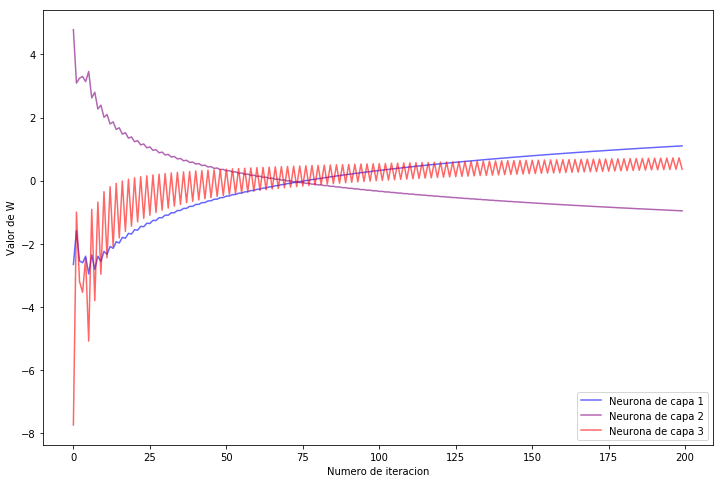

In [10]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
w_1 = scaler1.fit_transform(np.array(w_1).reshape(-1, 1))
w_2 = scaler1.fit_transform(np.array(w_2).reshape(-1, 1))
w_3 = scaler1.fit_transform(np.array(w_3).reshape(-1, 1))
plt.plot(x_1,w_1, c="blue", alpha=0.6, label="Neurona de capa 1")
plt.plot(x_1,w_2, c="purple", alpha=0.6, label="Neurona de capa 2")
plt.plot(x_1,w_3, c="red", alpha=0.6, label="Neurona de capa 3")
plt.xlabel("Numero de iteracion")
plt.ylabel("Valor de W")
plt.legend(loc="lower right")

#### Cerramos la sesión

In [22]:
sess.close()

#### Conclusiones

En la gráfica podemos observar cómo cambian los valores de los pesos de una neurona de cada capa de nuestra red neuronal y notamos que la neurona de la capa 3 (la capa de output) es la que registra mayores cambios. Las dos capas anteriores cambian a un ritmo mucho menor mostrando lo que ya intuíamos que la capa de salida es la que cambia o aprende más rápidamente.